<a href="https://colab.research.google.com/github/bigCow13/Study/blob/main/Prisoner's_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

100 Prisoners and a Light Bulb - Simulating the problem

An interesting logic puzzle introduced to me by a friend over Christmas dinner - 
got curious on how many days it would take for the prisoners to get out given the solution.

Problem and solution found here: 

https://medium.com/i-math/100-prisoners-and-a-light-bulb-573426272f4c

#Environment

In [78]:
## Packages for general use 
# Data Management/array
import pandas as pd
import numpy as np

# Data Manipulation
import itertools
import statistics
import random 

# Pipelining
from joblib import Parallel, delayed                                            

# Charting
import matplotlib.pyplot as plt
import seaborn as sns                                                           # Distribution plots

#Initial Parameters

In [42]:
# Set up initial  parameters
n = 100                           # Number of prisoners
lb_status = 0                   # Lightbulb status - 0 is off and 1 is on
chief_prisoner = 0              # Assigned prisoner counting
day_count = 0
count_prisoners = 0
turnoff_count = 0

# Prisoner Array
a = np.array(range(0,n))
# Status Array
b = np.zeros(n)
# Create problem array
prob_arr = np.array([a,b])

In [3]:
# Check array
prob_arr

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94., 95., 96., 97., 98., 99.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

#Simulation

##Playing out a single day

In [4]:
# Set up a single day

# Stage 1 - Randomly pick a prisoner
prisoner = random.randint(0,n-1)
day_count = day_count + 1

# Stage 2 - Lightbulb 

# Here prisoner knows if he has been in the room before
prisoner_status = prob_arr[1,prisoner]

# Leave lightbulb in current state, if first time and lightbulb is off - turn on
# First timers
if prisoner_status == 0 and lb_status == 0 and chief_prisoner != prisoner : 
    lb_status = 1
    prob_arr[1,prisoner] = 1 
# Chief prisoner's job to turn off
elif prisoner == chief_prisoner and lb_status == 1 :
    lb_status = 0
    turnoff_count = turnoff_count + 1
# All others who have been into the room before         
else : 
    lb_status = lb_status 
print('day: '+ str(day_count) +'  prisoner: '+str(prisoner)+ '  lightbulb: '+ str(lb_status))
count_prisoners = sum(prob_arr[1])

day: 1  prisoner: 19  lightbulb: 1


## Playing out a full escape 

In [ ]:
while turnoff_count < n-1 : 
    
    # Set up a round
    # Stage 1 - Randomly pick a prisoner
    prisoner = random.randint(0,n-1)
    day_count = day_count + 1
    
    # Stage 2 - Lightbulb 
    # Here prisoner knows if he has been in the room before
    prisoner_status = prob_arr[1,prisoner]

    # Leave lightbulb in current state, if first time and lightbulb is off - turn on
    # First timers
    if prisoner_status == 0 and lb_status == 0 and chief_prisoner != prisoner : 
        lb_status = 1
        prob_arr[1,prisoner] = 1 

    # Chief prisoner's job to turn off
    elif prisoner == chief_prisoner and lb_status == 1 :
        lb_status = 0
        turnoff_count = turnoff_count + 1
    # All others who have been into the room before         
    else : 
        lb_status = lb_status 

    print('day: '+ str(day_count) +'  prisoner: '+str(prisoner)+ '  lightbulb: '+ str(lb_status))
    count_prisoners = sum(prob_arr[1])

## Simulating multiple runs

In [115]:
def prisoner_function(n): 
    # Set up initial  parameters
    # n = 100                       # Make this a variable
    lb_status = 0                   # Lightbulb status - 0 is off and 1 is on
    chief_prisoner = 0              # Assigned prisoner counting
    day_count = 0
    count_prisoners = 0
    turnoff_count = 0
    
    # Prisoner Array
    a = np.array(range(0,n))
    # Status Array
    b = np.zeros(n)
    # Create problem array
    prob_arr = np.array([a,b])
    # Set up a single escape

    while turnoff_count < n-1 : 
        # Set up a round
        # Stage 1 - Randomly pick a prisoner
        prisoner = random.randint(0,n-1)
        day_count = day_count + 1

        # Stage 2 - Lightbulb 
        # Here prisoner knows if he has been in the room before
        prisoner_status = prob_arr[1,prisoner]

        # Leave lightbulb in current state, if first time and lightbulb is off - turn on
        # First timers
        if prisoner_status == 0 and lb_status == 0 and chief_prisoner != prisoner : 
            lb_status = 1
            prob_arr[1,prisoner] = 1 

        # Chief prisoner's job to turn off
        elif prisoner == chief_prisoner and lb_status == 1 :
            lb_status = 0
            turnoff_count = turnoff_count + 1
        # All others who have been into the room before         
        else : 
            lb_status = lb_status 

        #print('day: '+ str(day_count) +'  prisoner: '+str(prisoner)+ '  lightbulb: '+ str(lb_status))
        count_prisoners = sum(prob_arr[1])
    return(day_count)

In [108]:
# Pipeline the simulation
# 2 parameters - number of prisoners and number of simulations
sim = Parallel(n_jobs = -1)(delayed(prisoner_function)(100) for i in range(500))

# Average years 
print('Average years: ' + str(round(np.mean(sim)/365,2)))

28.623983561643836


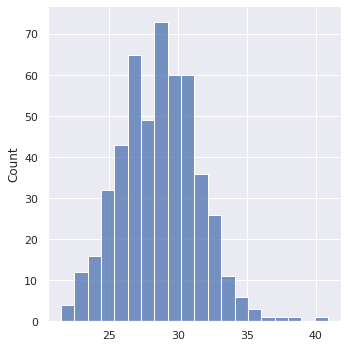

In [109]:
# Plot results
sim2 = np.array(sim)
sim2 = sim2/365
sim2

ax = sns.displot(sim2)

Average of ~ 28 years for the prisoners to escape. Some unlucky bastards spent 40 years playing it out. 